In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [ ]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [ ]:
train_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [ ]:
train_data

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
0             60       RL         65.0  ...        WD        Normal    208500
1             20       RL         80.0  ...        WD        Normal    181500
2             60       RL         68.0  ...        WD        Normal    223500
3             70       RL         60.0  ...        WD       Abnorml    140000
4             60       RL         84.0  ...        WD        Normal    250000
...          ...      ...          ...  ...       ...           ...       ...
1455          60       RL         62.0  ...        WD        Normal    175000
1456          20       RL         85.0  ...        WD        Normal    210000
1457          70       RL         66.0  ...        WD        Normal    266500
1458          20       RL         68.0  ...        WD        Normal    142125
1459          20       RL         75.0  ...        WD        Normal    147500

[1460 rows x 75 columns]

In [ ]:
for i in train_data:
  if train_data[i].dtype == object:
    mode = train_data[i].mode()
    train_data[i].fillna(mode[0], inplace = True)
  else:
    mode = train_data[i].mean()
    train_data[i].fillna(mode, inplace = True)

In [ ]:
poke_df = train_data

In [ ]:
gen_le = LabelEncoder()
for i in poke_df:
  if poke_df[i].dtype == object:
    gen_labels = gen_le.fit_transform(poke_df[i]).astype(float)
    train_data[i] = gen_labels

In [ ]:
train_data.describe()

MSSubClass     MSZoning  ...  SaleCondition      SalePrice
count  1460.000000  1460.000000  ...    1460.000000    1460.000000
mean     56.897260     3.028767  ...       3.770548  180921.195890
std      42.300571     0.632017  ...       1.100854   79442.502883
min      20.000000     0.000000  ...       0.000000   34900.000000
25%      20.000000     3.000000  ...       4.000000  129975.000000
50%      50.000000     3.000000  ...       4.000000  163000.000000
75%      70.000000     3.000000  ...       4.000000  214000.000000
max     190.000000     4.000000  ...       5.000000  755000.000000

[8 rows x 75 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  Condition2     1460 non-null   float64
 13  BldgType       1460 non-null   float64
 14  HouseStyle     1460 non-null   float64
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

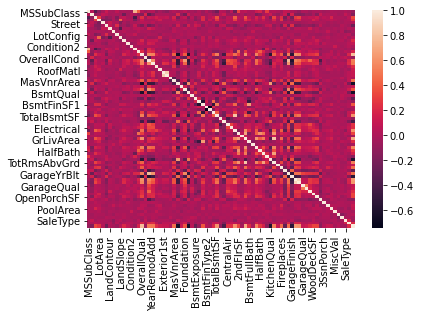

In [ ]:
corr = train_data.corr()
sns.heatmap(corr)

In [ ]:
c = 0
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            #print(corr.iloc[i,j])
            c = c + 1
            #print(c)
            if columns[j]:
                columns[j] = False

selected_columns = train_data.columns[columns]
data = train_data[selected_columns]

In [ ]:
len(selected_columns)
selected_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
     

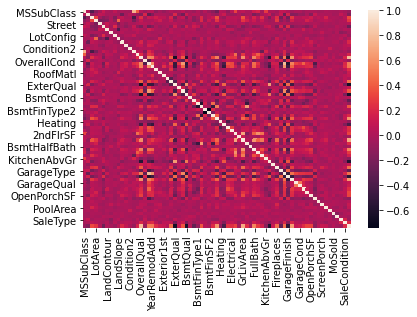

In [ ]:
corr1 = data.corr()
sns.heatmap(corr1)

In [ ]:
se = pd.Series(selected_columns)
se
#selected_columns = se.drop(['SalePrice'])

0        MSSubClass
1          MSZoning
2       LotFrontage
3           LotArea
4            Street
          ...      
66           MoSold
67           YrSold
68         SaleType
69    SaleCondition
70        SalePrice
Length: 71, dtype: object

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
#adding a column of ones for b0x0
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
#preparing for the backward elimination for having a proper model
import statsmodels.formula.api as sm

In [ ]:
selected_columns = selected_columns[:-1:]
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x)
    for i in range(0, numVars):
        regressor_OLS = sm.ols(x, Y).fit()
        #sm.OLS(endog=y, exog=X_opt).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    #regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[0,:70].values, data.iloc[:,70].values, SL, selected_columns )

PatsyError: ignored

In [ ]:
selected_columns[1:].values

In [ ]:
data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /data.csv')

In [ ]:
data

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]

In [ ]:
data = data.iloc[:,1:-1]

In [ ]:
data

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0           M        17.99  ...          0.4601                  0.11890
1           M        20.57  ...          0.2750                  0.08902
2           M        19.69  ...          0.3613                  0.08758
3           M        11.42  ...          0.6638                  0.17300
4           M        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564         M        21.56  ...          0.2060                  0.07115
565         M        20.13  ...          0.2572                  0.06637
566         M        16.60  ...          0.2218                  0.07820
567         M        20.60  ...          0.4087                  0.12400
568         B         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]

In [ ]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

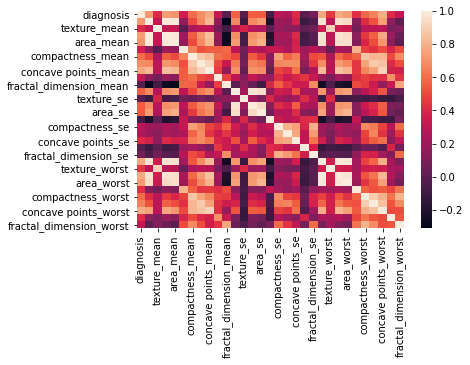

In [ ]:
corr = data.corr()
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [ ]:
selected_columns = selected_columns[1:]
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.ols(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

PatsyError: ignored